# Summary

Objective:
- Use boosting methods to predict individual's incomes based on census data

Methods Used:

- AdaBoost & Grid Search
- Random Forest
- Gradient Boost & Grid Search
- XGBoost & RandomizedSearchCV

# Part 1: Data Processing

In [1]:
import pandas as pd

a. import data from website directly

In [24]:
adult_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None, skipinitialspace=True)

In [25]:
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [26]:
adult_df.shape

(32561, 15)

b. build column names

In [27]:
column_names = ['age', 'workclass', 'fnlwgt','education', 'education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','salary']

In [28]:
adult_df.columns = column_names

In [29]:
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


c. check shape

In [30]:
adult_df.shape

(32561, 15)

d. drop 3rd column

In [31]:
adult_df = adult_df.drop(['fnlwgt'],axis = 1)

In [33]:
adult_df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


e.  Note: There are random values of  '?' that show up in the data - this is fine! These just refer to "unknown" and can be left as is. This data has no true NA values, so no need to check.

f. use .replace() method to make changes to 'salary' column.  <= 50k should become 0, >=50k should become 1

In [34]:
adult_df = adult_df.replace('<=50K',0)

In [35]:
adult_df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [39]:
adult_df = adult_df.replace('>50K',1)

In [40]:
adult_df.head(20)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


g. create predictors df

In [41]:
X = adult_df.iloc[:,0:13]

In [42]:
X.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [45]:
X.shape

(32561, 13)

h. create y dataframe

In [43]:
y = adult_df.iloc[:,13]

In [44]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: salary, dtype: int64

In [46]:
y.shape

(32561,)

i. one hot encoding with get_dummies for entire X dataframe

In [48]:
X_encoded = pd.get_dummies(X)

In [49]:
X_encoded.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [240]:
X_encoded.iloc[:,1]

0        13
1        13
2         9
3         7
4        13
         ..
32556    12
32557     9
32558     9
32559     9
32560     9
Name: education_num, Length: 32561, dtype: int64

In [50]:
X_encoded.shape

(32561, 107)

j. split into train/test with 70/30 split

In [51]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = .30, random_state = 42)

In [66]:
X_train.shape

(22792, 107)

In [67]:
X_test.shape

(9769, 107)

In [68]:
y_train.shape

(22792,)

# Part 2: Random Forest Classifier - Base Model

a. create a simple random forest using only default parameters. 

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf_clf = RandomForestClassifier()

In [71]:
rf_clf.fit(X_train, y_train)

C:\Users\mhime\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

b. predict on test data using predict() and predict_proba()

In [97]:
y_pred = rf_clf.predict(X_test)

In [73]:
y_pred_proba = rf_clf.predict_proba(X_test)

c. Calculate confusion matrix and classification report

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(confusion_matrix(y_test, y_pred))

[[6870  585]
 [ 927 1387]]


In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7455
           1       0.70      0.60      0.65      2314

    accuracy                           0.85      9769
   macro avg       0.79      0.76      0.77      9769
weighted avg       0.84      0.85      0.84      9769



d. calculate AUC score

In [79]:
from sklearn.metrics import roc_auc_score

In [84]:
print(roc_auc_score(y_test, y_pred_proba[:,1]))

0.8689965781435951


In [85]:
print(roc_auc_score(y_test, y_pred_proba[:,0]))

0.13100194367008738


e. identify the top 5 features

In [86]:
importances = rf_clf.feature_importances_

In [87]:
importances

array([2.20128789e-01, 6.57425894e-02, 1.09191488e-01, 3.40902616e-02,
       1.10639048e-01, 2.14553757e-03, 6.11027035e-03, 6.69218329e-03,
       5.27362127e-06, 1.23905742e-02, 7.27330428e-03, 9.28401965e-03,
       5.36983236e-03, 1.10454825e-04, 1.48451249e-03, 3.09961740e-03,
       1.22071435e-03, 5.45312602e-04, 1.08778802e-03, 1.44616917e-03,
       1.74050169e-03, 2.92654904e-03, 3.57034397e-03, 1.29689406e-02,
       3.83012507e-03, 7.80247123e-03, 8.46566557e-03, 4.95804690e-05,
       4.81677652e-03, 5.98013982e-03, 4.11846244e-03, 2.75373166e-04,
       7.03694051e-02, 9.07880901e-04, 2.45716919e-02, 1.71458736e-03,
       1.71854410e-03, 2.34642535e-03, 6.27653382e-03, 1.57787603e-05,
       8.13869616e-03, 1.72717120e-02, 5.12918993e-03, 4.43097104e-03,
       5.11829669e-03, 6.45797485e-03, 1.25548378e-04, 1.60715872e-02,
       3.02909956e-03, 8.66559859e-03, 5.62419300e-03, 5.25980612e-03,
       4.26126925e-02, 1.03835470e-02, 1.33722389e-03, 7.38725394e-03,
      

In [88]:
import numpy as np

In [90]:
indicies = np.argsort(importances)[::-1]

In [94]:
for f in range(5):
              print("%d. feature %d (%f)" % (f+1, indicies[f], importances[indicies[f]]))

1. feature 0 (0.220129)
2. feature 4 (0.110639)
3. feature 2 (0.109191)
4. feature 32 (0.070369)
5. feature 1 (0.065743)


f. predict for the train data. is there overfitting?

In [96]:
y_pred_train = rf_clf.predict(X_train)

In [98]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17265
           1       0.96      0.91      0.94      5527

    accuracy                           0.97     22792
   macro avg       0.97      0.95      0.96     22792
weighted avg       0.97      0.97      0.97     22792



In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7455
           1       0.70      0.60      0.65      2314

    accuracy                           0.85      9769
   macro avg       0.79      0.76      0.77      9769
weighted avg       0.84      0.85      0.84      9769



Yes there is overfitting, the classification report's accuracy, precision, recall and f1scores show the model fits the training data much better than the test data

# Part 3: AdaBoost Classifier - GridSearch

a. create a simple AdaBoostClassifier with default paramaters.  Then run GridSearchCV using: n_estimators:100,200,300,400; learning_rate:0.2,0.4,0.6,0.8,1,1.2.  Use 5 cross-fold and roc_auc for scoring

In [100]:
from sklearn.ensemble import AdaBoostClassifier

In [104]:
ada_clf = AdaBoostClassifier()

In [105]:
param_grid = [{"n_estimators": [100,200,300,400], 'learning_rate':[0.2,0.4,0.6,0.8,1,1.2]}]

In [103]:
from sklearn.model_selection import GridSearchCV

In [106]:
grid_search = GridSearchCV(ada_clf, param_grid, cv=5, scoring ='roc_auc')

In [107]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid=[{'learning_rate': [0.2, 0.4, 0.6, 0.8, 1, 1.2],
                          'n_estimators': [100, 200, 300, 400]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [108]:
grid_search.best_params_

{'learning_rate': 1.2, 'n_estimators': 400}

In [109]:
new_param_grid = [{"n_estimators": [400,500], 'learning_rate':[1.2, 1.4]}]

In [110]:
grid_search_other = GridSearchCV(ada_clf, new_param_grid, cv=5, scoring ='roc_auc')

In [111]:
grid_search_other.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid=[{'learning_rate': [1.2, 1.4],
                          'n_estimators': [400, 500]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [116]:
grid_search_other.best_params_

{'learning_rate': 1.4, 'n_estimators': 500}

In [118]:
add_param_grid = [{"n_estimators": [500,600,700], 'learning_rate':[1.4,1.6,1.8]}]

In [119]:
grid_search_add = GridSearchCV(ada_clf, add_param_grid, cv=5, scoring = 'roc_auc')

In [120]:
grid_search_add.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid=[{'learning_rate': [1.4, 1.6, 1.8],
                          'n_estimators': [500, 600, 700]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [121]:
grid_search_add.best_params_

{'learning_rate': 1.4, 'n_estimators': 700}

b. use best estimator from GridSearchCV to predict on test data. use predict() and predict_proba() methods

In [123]:
gs_ada_clf = grid_search_add.best_estimator_

In [124]:
gs_ada_y_pred = gs_ada_clf.predict(X_test)

In [125]:
gs_ada_y_pred_proba = gs_ada_clf.predict_proba(X_test)

c. Calculate the confusion matrix and classification report

In [126]:
print(confusion_matrix(y_test, gs_ada_y_pred))

[[7010  445]
 [ 801 1513]]


In [128]:
print(classification_report(y_test, gs_ada_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.77      0.65      0.71      2314

    accuracy                           0.87      9769
   macro avg       0.84      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769



d. calculate the AUC score

In [131]:
print(roc_auc_score(y_test, gs_ada_y_pred_proba[:,1]))

0.9254875261363629


e. identify the top 5 features

In [154]:
ada_importances = gs_ada_clf.feature_importances_

In [155]:
indicies = np.argsort(ada_importances)[::-1]

In [156]:
for f in range(5):
    print("%d. feature %d (%f)" % (f+1, indicies[f], ada_importances[indicies[f]]))

1. feature 3 (0.394286)
2. feature 2 (0.280000)
3. feature 0 (0.100000)
4. feature 4 (0.061429)
5. feature 1 (0.011429)


f. predict for train data.  is there overfitting for the best estimator?

In [141]:
gs_ada_y_train_pred = gs_ada_clf.predict(X_train)

In [142]:
print(classification_report(y_train, gs_ada_y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     17265
           1       0.79      0.66      0.72      5527

    accuracy                           0.87     22792
   macro avg       0.84      0.80      0.82     22792
weighted avg       0.87      0.87      0.87     22792



In [143]:
print(classification_report(y_test, gs_ada_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.77      0.65      0.71      2314

    accuracy                           0.87      9769
   macro avg       0.84      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769



there does not appear to be overfitting at this time

# Part 4: Gradient Boosting Classifier- GridSearch

a. Use GradientBoostingClassifier along with GridSearchCV tool. Run GridSearchCV using: ({'n_estimators': [100,200,300,400], 'learning_rate': [0.2,0.6,1], 'max_depth':[1,2]}.  Use 5 cross-fold and "roc_auc" for scoring

In [144]:
from sklearn.ensemble import GradientBoostingClassifier

In [145]:
gb_clf = GradientBoostingClassifier()

In [146]:
param_grid = [{'n_estimators': [100,200,300,400], 'learning_rate': [0.2,0.6,1], 'max_depth':[1,2]}]

In [147]:
grid_search_gb = GridSearchCV(gb_clf, param_grid, cv=5, scoring = 'roc_auc')

In [148]:
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [149]:
grid_search_gb.best_params_

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 400}

In [150]:
param_grid_other = [{'n_estimators': [400,500,600,700], 'max_depth':[2,3,4]}]

In [151]:
grid_search_gb_other = GridSearchCV(gb_clf, param_grid_other, cv=5, scoring = 'roc_auc')

In [152]:
grid_search_gb_other.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [153]:
grid_search_gb_other.best_params_

{'max_depth': 3, 'n_estimators': 700}

In [157]:
param_grid_add = [{'n_estimators': [700,800,900,1000]}]

In [158]:
grid_search_gb_add = GridSearchCV(gb_clf, param_grid_add, cv=5, scoring = 'roc_auc')

In [159]:
grid_search_gb_add.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [160]:
grid_search_gb_add.best_params_

{'n_estimators': 700}

In [163]:
best_params = [{'n_estimators': [700], 'learning_rate': [0.2], 'max_depth':[3]}]

In [164]:
grid_search_gb_best = GridSearchCV(gb_clf, best_params, cv=5, scoring = 'roc_auc')

In [165]:
grid_search_gb_best.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [166]:
grid_search_gb_best.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 700}

b. use best estimator from gridserch to predict on test data. use predict and predictproba

In [167]:
gs_gb_clf = grid_search_gb_best.best_estimator_

In [168]:
gs_gb_y_pred = gs_gb_clf.predict(X_test)

In [169]:
gs_gb_y_pred_proba = gs_gb_clf.predict_proba(X_test)

c. Calculate confusion matrix and classification report

In [170]:
print(confusion_matrix(y_test, gs_gb_y_pred))

[[6966  489]
 [ 789 1525]]


In [172]:
print(classification_report(y_test, gs_gb_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      7455
           1       0.76      0.66      0.70      2314

    accuracy                           0.87      9769
   macro avg       0.83      0.80      0.81      9769
weighted avg       0.86      0.87      0.87      9769



d. calculate the AUC score

In [174]:
print(roc_auc_score(y_test, gs_gb_y_pred_proba[:,1]))

0.9235373636228202


e. identify the top 5 features

In [175]:
gb_importances = gs_gb_clf.feature_importances_

In [176]:
indicies_gb = np.argsort(gb_importances)[::-1]

In [177]:
for f in range(5):
    print("%d. feature %d (%f)" % (f+1, indicies_gb[f], gb_importances[indicies_gb[f]]))

1. feature 32 (0.341083)
2. feature 2 (0.188920)
3. feature 1 (0.175900)
4. feature 0 (0.072553)
5. feature 3 (0.060581)


f. predict for train data.  is there overfitting for the best estimator?

In [178]:
gs_gb_y_train_pred = gs_gb_clf.predict(X_train)

In [179]:
print(classification_report(y_train, gs_gb_y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     17265
           1       0.84      0.74      0.78      5527

    accuracy                           0.90     22792
   macro avg       0.88      0.85      0.86     22792
weighted avg       0.90      0.90      0.90     22792



In [180]:
print(classification_report(y_test, gs_gb_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      7455
           1       0.76      0.66      0.70      2314

    accuracy                           0.87      9769
   macro avg       0.83      0.80      0.81      9769
weighted avg       0.86      0.87      0.87      9769



There are signs of overfitting here because the test model fits slightly worse than the train model, based on the scores in the classification report

# Part 5: XGBoost-RandomizedSearchCV

Repeat 4(a)-4(f) with xgboost and RandomizedSerchCV. Use parameters [{'n_estimators': [100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000], 'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6], 'max_depth': [1,2], 'gamma': gamma_range]

In [202]:
gamma_range = np.arange(0,5,.25).tolist()

In [203]:
gamma_range

[0.0,
 0.25,
 0.5,
 0.75,
 1.0,
 1.25,
 1.5,
 1.75,
 2.0,
 2.25,
 2.5,
 2.75,
 3.0,
 3.25,
 3.5,
 3.75,
 4.0,
 4.25,
 4.5,
 4.75]

In [189]:
from xgboost import XGBClassifier

In [190]:
xgb_clf = XGBClassifier()

In [212]:
xgb_params = {'n_estimators': [100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000], 'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6], 'max_depth': [1,2], 'gamma': np.arange(0,5,.25).tolist()}

In [213]:
from sklearn.model_selection import RandomizedSearchCV

In [214]:
random_search_xgb = RandomizedSearchCV(xgb_clf, xgb_params, cv=5, scoring = 'roc_auc')

In [215]:
random_search_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                                                  1.25, 1.5, 1.75, 2.0, 2.25,
                                                  2.5, 2.75, 3.0, 3.25, 3.5,
                                                  3.75, 4.0, 4.25, 

In [216]:
random_search_xgb.best_params_

{'n_estimators': 1000, 'max_depth': 2, 'learning_rate': 0.4, 'gamma': 0.25}

b. use best estimator from gridserch to predict on test data. use predict and predictproba

In [217]:
rs_xgb_clf = random_search_xgb.best_estimator_

In [218]:
rs_xgb_y_pred = rs_xgb_clf.predict(X_test)

In [219]:
rs_xgb_y_pred_proba = rs_xgb_clf.predict_proba(X_test)

c. Calculate confusion matrix and classification report

In [220]:
print(confusion_matrix(y_test, rs_xgb_y_pred))

[[7025  430]
 [ 790 1524]]


In [222]:
print(classification_report(y_test, rs_xgb_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.78      0.66      0.71      2314

    accuracy                           0.88      9769
   macro avg       0.84      0.80      0.82      9769
weighted avg       0.87      0.88      0.87      9769



d. calculate the AUC score

In [223]:
print(roc_auc_score(y_test, rs_xgb_y_pred_proba[:,1]))

0.9273732861009328


e. identify the top 5 features

In [224]:
xgb_importances = rs_xgb_clf.feature_importances_

In [225]:
indicies_xgb = np.argsort(xgb_importances)[::-1]

In [226]:
for f in range(5):
    print("%d. feature %d (%f)" % (f+1, indicies_xgb[f], xgb_importances[indicies_xgb[f]]))

1. feature 32 (0.429304)
2. feature 1 (0.083036)
3. feature 41 (0.036885)
4. feature 55 (0.029630)
5. feature 2 (0.028540)


f. predict for train data.  is there overfitting for the best estimator?

In [227]:
rs_xgb_y_train_pred = rs_xgb_clf.predict(X_train)

In [228]:
print(classification_report(y_train, rs_xgb_y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     17265
           1       0.81      0.67      0.73      5527

    accuracy                           0.88     22792
   macro avg       0.85      0.81      0.83     22792
weighted avg       0.88      0.88      0.88     22792



In [229]:
print(classification_report(y_test, rs_xgb_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.78      0.66      0.71      2314

    accuracy                           0.88      9769
   macro avg       0.84      0.80      0.82      9769
weighted avg       0.87      0.88      0.87      9769



# Part 6: Conceptual Problems

a. What does the alpha parameter represent in AdaBoost?

This parameter represents predictor weights of each adaboost predictor in the sequence of learners.  It encompasses the given learning rate and the weighted error rate.  The weighted error rate takes into account correct and incorrect predictions of the previous model.  An accurate predictor will have a larger weight than an inaccurate predictor.  The alpha parameter is used to make predictions by weighting the predictions of all the predictors.

b. In AdaBoost, how is the final predicted class determined?  Include how the alpha term impacts it

AdaBoost is a sequential ensemble learning technique.  The process is as follows: 1. each instances in the training set starts with a relative weight of 1/m 2. an initial predictor is trained on the training set and outputs its predictions.  The predictor is given a weighted error rate of r1.  The predictor is then given a weight(alpha) by the equation learning rate* log((1-r1)/r1) 3. AdaBoost then works to improve the misclassified predictions of this base model. The misclassified predictions then have their relative weights increased by multiplying instance by exp(alpha).  then all instance weights are normalized 4. The next predictor in the sequence is then trained using these updated weights. 5. The algorithm stops when the perfect predictor is found, or the desired # of predictors is reached.  6.  Once that threshold is reached, AdaBoost computes the predictions of all predictors and weighs them using the predictor weights (alpha).  The final predicted class is the one that receives the majority of the the weighted votes (argmax).

c. In Gradient Boosting, what is the role of the max_depth paramete? Why is it important to tune this parameter?

It controls the level of granularity you want to include in your DecisionTree, and how many splits you want to make.  It is important to tune and typically reduce this as low as possibel to reduce risk of overfitting and improve generalization

d. In part e of Steps 2-5 you determined the top 5 predictors across each model.  Do any predictors show up in the top 5 predictors for all 3 models?  If so, comment on if this predictor makes sense given what you are attempting to predict.  

Feature 1 showed up on all my 3 models' top 5 predictors, and it stands for number of education years. This makes sense conceptually to be a strong predictor of salary

e. From the models run in steps 2-5 which performs best based on the Classification Report?  Support with evidence from your test data and share the optimal hyperparameters found through grid search.

The best model was XGBoost. It had an accuracy score of 88% on both the train and test set, signalling low overfitting tendencies and also high predicition accuracy. Its optimal hyperparameters were found through RandomizedSearch and were {'n_estimators': 1000, 'max_depth': 2, 'learning_rate': 0.4, 'gamma': 0.25}

f. For the best performing model, plot out a ROC curve using the test data. Describe what the x-axis and y-axis of the ROC curve tells us about a classifier

In [231]:
from sklearn.metrics import roc_curve

In [232]:
fpr, tpr, thresholds = roc_curve(y_test,rs_xgb_y_pred_proba[:,1])

In [233]:
auc = roc_auc_score(y_test,rs_xgb_y_pred_proba[:,1])

In [234]:
import matplotlib.pyplot as plt

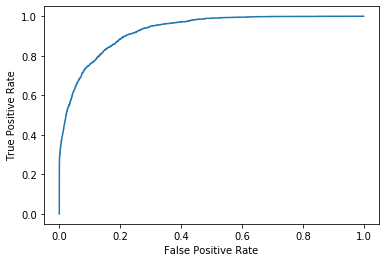

In [235]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

The x-axis shows us the False Positive Rate.  False Positive Rate is when we predicted the instance would belong to the positive class, but it did not.  True Positive Rate is on the y-axis and is calculated by taking the number of true positives (predicted positive class, is positive class) and dividing it by the sum of true positives and false negatives (predicted not belonging to the positive class, it does belong to the positive class).  It describes how good the model is at predicting the positive class when the instance does belong to the positive class